In [23]:
#libraries for plotting histogram
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1
import string
import nltk
from nltk.corpus import stopwords

import numpy as np
import plotly.plotly as py
from sklearn.datasets import fetch_20newsgroups #importing dataset
from sklearn.feature_extraction import text
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from collections import defaultdict
from collections import Counter
from nltk.stem.snowball import SnowballStemmer
import string
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
from sklearn import metrics


#LSI
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF

#metrics, accuracy, roc and confusion matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import itertools

#cross validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

#SVM imports

from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

#MNB import
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

#One vs One and One vs Rest
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier


<class 'numpy.ndarray'>
3150


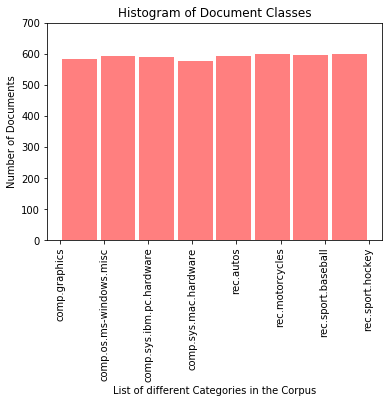

In [24]:
all_categories = ['comp.graphics','comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware','comp.sys.mac.hardware',
              'rec.autos','rec.motorcycles','rec.sport.baseball','rec.sport.hockey']
all_classes = ['Computer Technology','Recreational Activity']
twenty_train = fetch_20newsgroups(subset='train', categories=all_categories, shuffle=True, random_state=42, remove=('headers', 'footers', 'quotes'))
twenty_test =fetch_20newsgroups(subset='test', categories=all_categories, shuffle=True, random_state=42, remove=('headers', 'footers', 'quotes'))

print(type(twenty_train.target))

target_data = []
target_test_data = []

i=0
j=0

while(i<len(twenty_train.target)):
    if((twenty_train.target[i]>=4)):
       target_data.append(1)
    else:
       target_data.append(0)
    i=i+1
    
while(j<len(twenty_test.target)):
    if((twenty_test.target[j]>=4)):
       target_test_data.append(1)
    else:
       target_test_data.append(0)
    j=j+1

#Question A

print(len(target_test_data))

index=np.arange(8)
barwidth=0.3
histogram = plt.hist(twenty_train.target,bins=8,facecolor='red',orientation='vertical', alpha=0.5,rwidth=0.9)
plt.ylim(ymax= 700,ymin = 0)
plt.title('Histogram of Document Classes')
plt.xlabel('List of different Categories in the Corpus')
plt.ylabel('Number of Documents')
plt.xticks(index,all_categories,rotation = 90)
plt.show()


index=np.arange(8)
barwidth=0.3
histogram = plt.hist(twenty_train.target,bins=8,facecolor='red',orientation='vertical', alpha=0.5,rwidth=0.9)
plt.ylim(ymax= 700,ymin = 0)
plt.title('Histogram of Document Classes')
plt.xlabel('List of different Categories in the Corpus')
plt.ylabel('Number of Documents')
plt.xticks(index,all_categories,rotation = 60)
plt.show()

In [25]:
#Question B

def token(text):
    stemmer = SnowballStemmer("english")
    temp = text
    temp = re.sub(r'[^\w\s]','',temp) #removing punctuation
    temp = ''.join(i for i in temp if not i.isdigit()) #removing digit out of text
    temp = ''.join([i if ord(i) < 128 else ' ' for i in temp]) #removing non ascii
    vocal=temp.split()
    stemmed = [stemmer.stem(word) for word in vocal]
    return stemmed

final_token = CountVectorizer(analyzer = 'word',tokenizer=token,stop_words = 'english',min_df = 5)
count_of_words = final_token.fit_transform(twenty_train.data)
print("Dimensions of Numerical feature vector for training data: "+ str(count_of_words.shape))
print ("Number of terms Extracted for training data: " + str(count_of_words.shape[1]))
#TF-IDF Matrix for min_df=2
vectorizer = TfidfTransformer()
vectors = vectorizer.fit_transform(count_of_words)
size=vectors.shape
print("Dimensions of TF-IDF vector"+ str(size))

Dimensions of Numerical feature vector for training data: (4732, 5006)
Number of terms Extracted for training data: 5006
Dimensions of TF-IDF vector(4732, 5006)


In [26]:
#testing data
count_of_words_test = final_token.transform(twenty_test.data)
print("Dimensions of Numerical feature vector for test data: "+ str(count_of_words_test.shape))
print ("Number of terms Extracted for test data: " + str(count_of_words_test.shape[1]))
#TF-IDF Matrix for min_df=2
vectors_test = vectorizer.transform(count_of_words_test)
size=vectors_test.shape
print("Dimensions of TF-IDF vector for test data: "+ str(size))


Dimensions of Numerical feature vector for test data: (3150, 5006)
Number of terms Extracted for test data: 5006
Dimensions of TF-IDF vector for test data: (3150, 5006)


In [27]:
#Question C
reqd_categories=['comp.sys.ibm.pc.hardware','comp.sys.mac.hardware','misc.forsale','soc.religion.christian']


i=0
for category in reqd_categories:
    cat = [category]
    sub_data = fetch_20newsgroups(subset='all', categories=cat, shuffle=True, random_state=42, remove=('headers','footers','quotes'))
    vectorizer = TfidfVectorizer(analyzer='word',tokenizer=token, max_features=10, stop_words='english')
    vector = vectorizer.fit_transform(sub_data.data)
    print ("The top ten features in the list " + str(reqd_categories[i]) + str(vectorizer.vocabulary_.keys()))
    i+=1


The top ten features in the list comp.sys.ibm.pc.hardwaredict_keys(['card', 'use', 'control', 'know', 'disk', 'drive', 'problem', 'work', 'scsi', 'ani'])
The top ten features in the list comp.sys.mac.hardwaredict_keys(['work', 'know', 'like', 'mac', 'problem', 'use', 'appl', 'monitor', 'ani', 'drive'])
The top ten features in the list misc.forsaledict_keys(['new', 'ship', 'pleas', 'email', 'sale', 'drive', 'price', 'use', 'includ', 'offer'])
The top ten features in the list soc.religion.christiandict_keys(['know', 'christian', 'sin', 'say', 'god', 'peopl', 'think', 'jesus', 'believ', 'church'])


In [28]:
#Question D


#Training Data

#LSI for min_df=2
svd = TruncatedSVD(n_components=50, random_state=42)
LSI_transformed_tfidf = svd.fit_transform(vectors)
print("Dimensions of TF-IDF matrix after LSI for min_df = 2: "+ str(LSI_transformed_tfidf.shape))


nmf = NMF(n_components=50, init='random', random_state=42)

#nmf for min_df=2
NMF_transformed_tfidf = nmf.fit_transform(vectors)
print("Dimensions of TF-IDF matrix after LSI for min_df = 2: "+ str(NMF_transformed_tfidf.shape))


#Testing data

LSI_transformed_tfidf_test = svd.transform(vectors_test)
print("Dimensions of TF-IDF matrix after NMF for min_df = 2: "+ str(LSI_transformed_tfidf_test.shape))

NMF_transformed_tfidf_test = nmf.transform(vectors_test)
print("Dimensions of TF-IDF matrix after NMF for min_df = 2: "+ str(NMF_transformed_tfidf_test.shape))


Dimensions of TF-IDF matrix after LSI for min_df = 2: (4732, 50)
Dimensions of TF-IDF matrix after LSI for min_df = 2: (4732, 50)
Dimensions of TF-IDF matrix after NMF for min_df = 2: (3150, 50)
Dimensions of TF-IDF matrix after NMF for min_df = 2: (3150, 50)


In [29]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')




def compute_metrics(actual,predicted,labels):
    clf_report=classification_report(actual,predicted,target_names=labels)
    print(str(clf_report))
    acc_report=accuracy_score(actual,predicted)
    print("The accuracy of the above test is " + str(acc_report*100))
    cnf_matrix = confusion_matrix(actual, predicted)
    #print("The Confusion Matrix is \n"+ str(cnf_matrix))
    plot_confusion_matrix(cnf_matrix, classes=all_classes,
                      title='Confusion matrix, without normalization')
    plt1.figure()
    return 1
def compute_roc(actual,predicted):
    fpr, tpr, thresholds= roc_curve(actual, predicted)
    aucscore= roc_auc_score(actual, predicted)
    plt.xlabel('True Positive Values')
    plt.ylabel('False Positive Values')
    plt.plot(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % aucscore)
    plt.plot([0, 1], [0, 1],'b--')
    plt.legend(loc = 'lower right')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    return(plt.show())


========= Hard Margin SVM using LSI ============
                       precision    recall  f1-score   support

  Computer Technology       0.97      0.88      0.92      1560
Recreational Activity       0.89      0.98      0.93      1590

          avg / total       0.93      0.93      0.93      3150

The accuracy of the above test is 92.73015873015873
Confusion matrix, without normalization
[[1370  190]
 [  39 1551]]


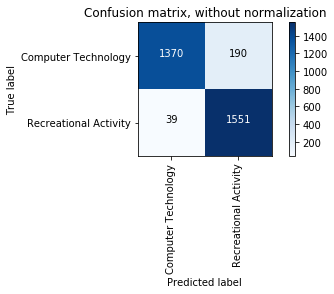

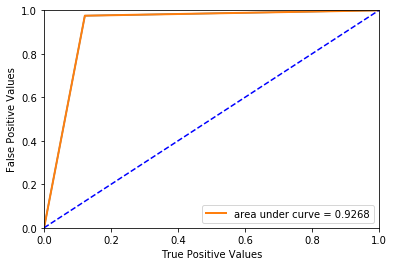


========= Soft Margin SVM using LSI ============


c:\users\aadit\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



                       precision    recall  f1-score   support

  Computer Technology       0.00      0.00      0.00      1560
Recreational Activity       0.50      1.00      0.67      1590

          avg / total       0.25      0.50      0.34      3150

The accuracy of the above test is 50.476190476190474
Confusion matrix, without normalization
[[   0 1560]
 [   0 1590]]


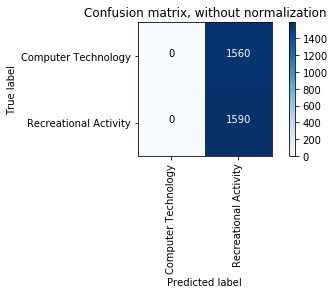

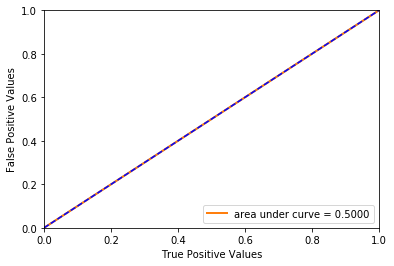

In [30]:
#Question E

print('========= Hard Margin SVM using LSI ============') 
classifier=SVC(C=1.0, kernel='linear',random_state=42)
classifier.fit(LSI_transformed_tfidf,target_data)
svm_prediction=classifier.predict(LSI_transformed_tfidf_test)
compute_metrics(target_test_data,svm_prediction,all_classes)
compute_roc(target_test_data,svm_prediction)


print()
print('========= Soft Margin SVM using LSI ============')
classifier=SVC(C=0.001, kernel='linear',random_state=42)
classifier.fit(LSI_transformed_tfidf,target_data)
svm_prediction=classifier.predict(LSI_transformed_tfidf_test)
compute_metrics(target_test_data,svm_prediction,all_classes)
compute_roc(target_test_data,svm_prediction)



=========Finding the best parameter  ============
Best parameters:

{'C': 1000, 'gamma': 0.001, 'kernel': 'linear'}

Detailed classification report:


                       precision    recall  f1-score   support

  Computer Technology       0.96      0.90      0.93      1560
Recreational Activity       0.91      0.96      0.93      1590

          avg / total       0.93      0.93      0.93      3150

The accuracy of the above test is 93.2063492063492
Confusion matrix, without normalization
[[1408  152]
 [  62 1528]]


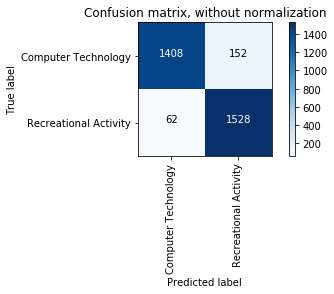

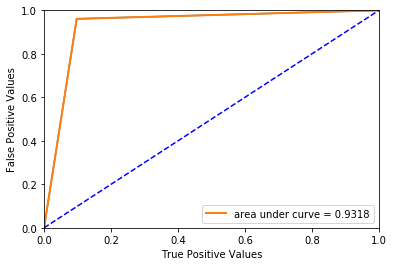

In [31]:
#Question F

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['linear'], 'gamma': [1e-3, 1e-2,1e-1, 1e0, 1e1, 1e2, 1e3],
                     'C': [0.1,1, 10, 100, 1000]}]

clf = GridSearchCV(SVC(), tuned_parameters, cv=5)
clf.fit(LSI_transformed_tfidf,target_data)
print('=========Finding the best parameter  ============')

print("Best parameters:")
print()
print(clf.best_params_)
print()
print("Detailed classification report:")
print()
y_pred = clf.predict(LSI_transformed_tfidf_test)
print()
compute_metrics(target_test_data, y_pred,all_classes)
compute_roc(target_test_data,y_pred)



======== Logistic Regression without regularization using LSI =========
[0 0 0 ... 1 0 0]
                       precision    recall  f1-score   support

  Computer Technology       0.97      0.88      0.92      1560
Recreational Activity       0.89      0.97      0.93      1590

          avg / total       0.93      0.93      0.93      3150

The accuracy of the above test is 92.53968253968254
Confusion matrix, without normalization
[[1373  187]
 [  48 1542]]


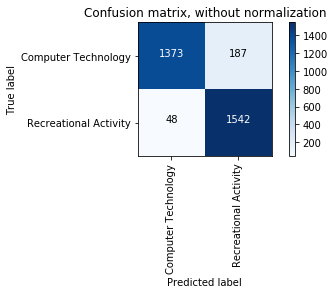

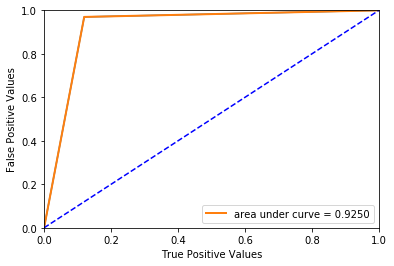



======== Logistic Regression with regularization using LSI (l1)=========


c:\users\aadit\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[0 0 0 ... 1 0 0]
                       precision    recall  f1-score   support

  Computer Technology       0.96      0.91      0.93      1560
Recreational Activity       0.92      0.96      0.94      1590

          avg / total       0.94      0.94      0.94      3150

The accuracy of the above test is 93.52380952380952
Confusion matrix, without normalization
[[1419  141]
 [  63 1527]]


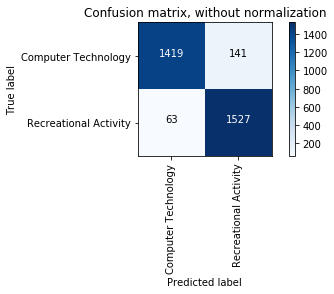

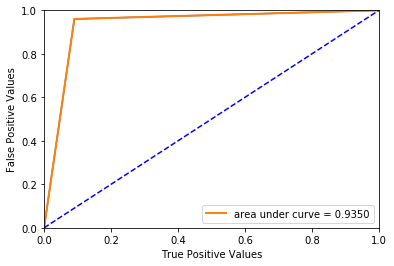



======== Logistic Regression with regularization using LSI(l2) =========
[0 0 0 ... 1 0 0]
                       precision    recall  f1-score   support

  Computer Technology       0.96      0.91      0.93      1560
Recreational Activity       0.92      0.96      0.94      1590

          avg / total       0.94      0.94      0.94      3150

The accuracy of the above test is 93.52380952380952
Confusion matrix, without normalization
[[1419  141]
 [  63 1527]]


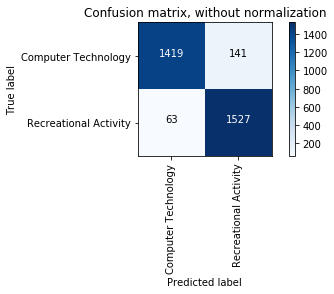

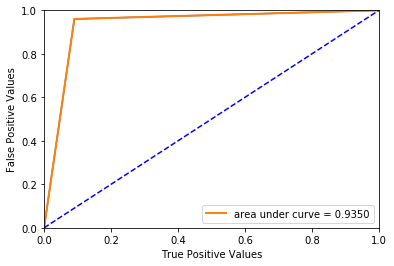

In [33]:

#Question H & I

print('======== Logistic Regression without regularization using LSI =========')
lr= LogisticRegression(C=1,random_state=42)
lrclassifier=lr.fit(LSI_transformed_tfidf,target_data)
lr_prediction=lrclassifier.predict(LSI_transformed_tfidf_test)
lr_predicted = (lr_prediction > 0.5).astype(int)
print(lr_predicted)
compute_metrics(target_test_data,lr_predicted,all_classes)
compute_roc(target_test_data,lr_predicted)


print()
print()

print('======== Logistic Regression with regularization using LSI (l1)=========')
lr= LogisticRegressionCV(Cs=10,penalty='l1',solver ='saga',random_state=42)
lrclassifier=lr.fit(LSI_transformed_tfidf,target_data)
lr_prediction=lrclassifier.predict(LSI_transformed_tfidf_test)
lr_predicted = (lr_prediction > 0.5).astype(int)
print(lr_predicted)
compute_metrics(target_test_data,lr_predicted,all_classes)
compute_roc(target_test_data,lr_predicted)

print()
print()


print('======== Logistic Regression with regularization using LSI(l2) =========')
lr= LogisticRegressionCV(Cs=10,penalty='l2', solver ='saga',random_state=42)
lrclassifier=lr.fit(LSI_transformed_tfidf,target_data)
lr_prediction=lrclassifier.predict(LSI_transformed_tfidf_test)
lr_predicted = (lr_prediction > 0.5).astype(int)
print(lr_predicted)
compute_metrics(target_test_data,lr_predicted,all_classes)
compute_roc(target_test_data,lr_predicted)

